In [1]:
options(warn=-1) #suppress warnings
require(data.table)
require(lubridate)
require(zoo)
library(forecast)
library(tseries)
library(ggplot2)
require(urca)
library(dplyr)
library(GGally)
data_path="/Users/furkan.celen/Downloads/production-10.csv" #en son verilen production file ı
production = fread(data_path)
production[,date:=as.Date(date)]

#HOUR COLUMNN HAS BEEN ADDED

# Load and prepare data
data_path = "/Users/furkan.celen/Downloads/processed_weather-9.csv" #en son verilen weather file ı
weather_info = fread(data_path)
weather_info = weather_info[complete.cases(weather_info)]
weather_info[, datetime := ymd(date) + dhours(hour)]
weather_info = weather_info[order(datetime)]

# Aggregate daily data with relevant weather metrics, grouped by date, hour, lat, lon, etc.
daily_series = weather_info[, .(
    DSWRF_surface = sum(dswrf_surface),
    TCDC_low_cloud = sum(tcdc_low.cloud.layer),
    TCDC_middle_cloud = sum(tcdc_middle.cloud.layer),
    TCDC_high_cloud = sum(tcdc_high.cloud.layer),
    TCDC_entire_atmosphere = sum(tcdc_entire.atmosphere),
    USWRF_top_of_atmosphere = sum(uswrf_top_of_atmosphere),
    CSNOW_surface = sum(csnow_surface),
    DLWRF_surface = sum(dlwrf_surface),
    USRWF_surface = sum(uswrf_surface),
    TMP_surface = sum(tmp_surface)
), by = .(date, hour, lat, lon)]

# Melt into long format, keeping 'date', 'hour', 'lat', 'lon' as id.vars
long_format = melt(daily_series, id.vars = c("date", "hour", "lat", "lon"), measure.vars = names(daily_series)[-1:-4], variable.name = "metric", value.name = "value")

# Create a new identifier for each unique combination of metric, lat, and lon
long_format[, identifier := paste(metric, lat, lon, sep = "_")]

# Reshape into wide format with 'date' and 'hour' as keys
wide_weather = dcast(long_format, date + hour ~ identifier, value.var = "value")

# Arrange columns to have 'date' and 'hour' next to each other
setcolorder(wide_weather, c("date", "hour", names(wide_weather)[-1:-2]))
str(wide_weather)


Zorunlu paket yükleniyor: data.table

Zorunlu paket yükleniyor: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Zorunlu paket yükleniyor: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:data.table’:

    yearmon, yearqtr


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Zorunlu paket yükleniyor: urca


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Re

Classes ‘data.table’ and 'data.frame':	21106 obs. of  252 variables:
 $ date                               : IDate, format: "2022-01-01" "2022-01-01" ...
 $ hour                               : int  4 5 6 7 8 9 10 11 12 13 ...
 $ CSNOW_surface_37.75_34.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_34.75          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_35             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_35.25          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_35.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_34.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_34.75          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_35             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_35.25          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_35.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.5_34.5            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surfa

In [2]:
#Putting together wide form of weather and production data
data =merge(wide_weather,production,by = c('date','hour'),all.x =T)
data <- data[order(date,hour)]
str(data)
data

Classes ‘data.table’ and 'data.frame':	21106 obs. of  253 variables:
 $ date                               : IDate, format: "2022-01-01" "2022-01-01" ...
 $ hour                               : int  4 5 6 7 8 9 10 11 12 13 ...
 $ CSNOW_surface_37.75_34.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_34.75          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_35             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_35.25          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_37.75_35.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_34.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_34.75          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_35             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_35.25          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.25_35.5           : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surface_38.5_34.5            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ CSNOW_surfa

date,hour,CSNOW_surface_37.75_34.5,CSNOW_surface_37.75_34.75,CSNOW_surface_37.75_35,CSNOW_surface_37.75_35.25,CSNOW_surface_37.75_35.5,CSNOW_surface_38.25_34.5,CSNOW_surface_38.25_34.75,CSNOW_surface_38.25_35,⋯,USWRF_top_of_atmosphere_38.75_34.75,USWRF_top_of_atmosphere_38.75_35,USWRF_top_of_atmosphere_38.75_35.25,USWRF_top_of_atmosphere_38.75_35.5,USWRF_top_of_atmosphere_38_34.5,USWRF_top_of_atmosphere_38_34.75,USWRF_top_of_atmosphere_38_35,USWRF_top_of_atmosphere_38_35.25,USWRF_top_of_atmosphere_38_35.5,production
<IDate>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2022-01-01,4,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
2022-01-01,5,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
2022-01-01,6,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
2022-01-01,7,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00
2022-01-01,8,0,0,0,0,0,0,0,0,⋯,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.40
2022-01-01,9,0,0,0,0,0,0,0,0,⋯,8.096,8.592,8.848,8.704,9.104,8.624,9.552,10.512,10.272,6.80
2022-01-01,10,0,0,0,0,0,0,0,0,⋯,105.264,120.656,137.664,142.336,133.104,132.960,162.352,179.808,177.152,9.38
2022-01-01,11,0,0,0,0,0,0,0,0,⋯,127.472,130.512,142.112,147.088,160.240,148.576,182.608,210.560,212.928,7.65
2022-01-01,12,0,0,0,0,0,0,0,0,⋯,141.328,140.320,150.656,150.096,179.024,165.360,201.632,234.480,234.352,6.80


In [3]:
# Averaging the data
avgdata=data.table(date=data$date,hour=data$hour,CSNOW=rowSums(data[,3:27])/25,DLWRF=rowSums(data[,28:52])/25,DSWRF=rowSums(data[,53:77])/25,TCDC_ENTIRE=rowSums(data[,78:102])/25,TCDC_High_Cloud=rowSums(data[,103:127])/25,TCDC_Low_Cloud=rowSums(data[,128:152])/25,TCDC_Middle_Cloud=rowSums(data[,153:177])/25,TMP_surface=rowSums(data[,178:202])/25,USRWF_surface=rowSums(data[,203:227])/25,USWRF_top_of_atmosphere=rowSums(data[,228:252])/25,production=data$production,month=as.numeric(format(data$date,format="%m")))


In [14]:
# Load the data 
avgdata$date <- as.Date(avgdata$date)

# Define training and test periods
train_start <- as.Date("2023-01-01")
test_start <- as.Date("2024-02-01")
test_end <- as.Date("2024-05-15")

# Filter data
train_data <- avgdata %>%
  filter(date >= train_start & date < test_start)
test_data <- avgdata %>%
  filter(date >= test_start & date <= test_end)


## Accuracy Function

In [5]:
# Accuracy Reporting
accu <- function(actual, forecast) {
  n <- length(actual)
  error <- actual - forecast
  mean_val <- mean(actual)
  sd_val <- sd(actual)
  CV <- sd_val / mean_val
  FBias <- sum(error) / sum(actual)
  MAPE <- sum(abs(error / actual)) / n
  RMSE <- sqrt(sum(error^2) / n)
  MAD <- sum(abs(error)) / n
  MADP <- sum(abs(error)) / sum(abs(actual))
  WMAPE <- MAD / mean_val
  
  accuracy_report <- data.frame(
    n = n, mean = mean_val, sd = sd_val, CV = CV, FBias = FBias,
    MAPE = MAPE, RMSE = RMSE, MAD = MAD, MADP = MADP, WMAPE = WMAPE
  )
  
  return(accuracy_report)
}

## Arima Model for each hour seperately

Individual ARIMA models are fitted for each hour of the day. This approach can capture the hourly patterns and seasonality in the data effectively.

In [6]:
ForecastReportAutoAr <- function(x_date) {
  arima_vec <- rep(NA, 24)
  for (i in 0:23) {
    dataf <- train_data %>%
      filter(hour == i & date < x_date) %>%
      select(production)
    dataf_ts <- ts(dataf$production, frequency = 24)
    fitted <- auto.arima(dataf_ts, seasonal = TRUE, trace = FALSE)
    forecasted <- forecast(fitted, h = 1)
    arima_vec[i + 1] <- forecasted$mean[1]
  }
  return(arima_vec)
}


## SARIMA model for the whole time series assuming frequency of 24 hours

A SARIMA model is fitted for the entire time series, assuming a frequency of 24 hours. This approach can capture daily seasonality directly.

In [7]:
ForecastReportAutoSarima <- function(x_date) {
  dataf <- train_data %>%
    filter(date < x_date) %>%
    arrange(date, hour) %>%
    select(production)
  dataf_ts <- ts(dataf$production, frequency = 24)
  fitted_sarima <- auto.arima(dataf_ts, seasonal = TRUE, trace = FALSE)
  forecasted <- forecast(fitted_sarima, h = 24)
  return(forecasted$mean)
}


## Hybrid Method (Dynamic Regression) with 6 regressors

### Identifying Significant Regressors


In [8]:
linear_model <- lm(production~.-date-hour-month+as.factor(month)+as.factor(hour)-production, data = train_data)
summary(linear_model)


Call:
lm(formula = production ~ . - date - hour - month + as.factor(month) + 
    as.factor(hour) - production, data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8080 -0.5263 -0.0076  0.6711  8.5857 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -5.181e+01  1.167e+00 -44.408  < 2e-16 ***
CSNOW                   -4.897e-01  9.247e-02  -5.296 1.20e-07 ***
DLWRF                   -3.581e-02  9.581e-04 -37.378  < 2e-16 ***
DSWRF                    1.875e-04  1.742e-04   1.076 0.281844    
TCDC_ENTIRE             -1.813e-03  8.418e-04  -2.154 0.031256 *  
TCDC_High_Cloud          5.510e-05  6.714e-04   0.082 0.934603    
TCDC_Low_Cloud           1.039e-02  8.868e-04  11.713  < 2e-16 ***
TCDC_Middle_Cloud        5.045e-03  6.373e-04   7.917 2.57e-15 ***
TMP_surface              2.213e-01  4.898e-03  45.191  < 2e-16 ***
USRWF_surface            4.516e-03  4.758e-04   9.490  < 2e-16 ***
USWRF_top_of_atmospher


	Breusch-Godfrey test for serial correlation of order up to 48

data:  Residuals
LM test = 9249.1, df = 48, p-value < 2.2e-16


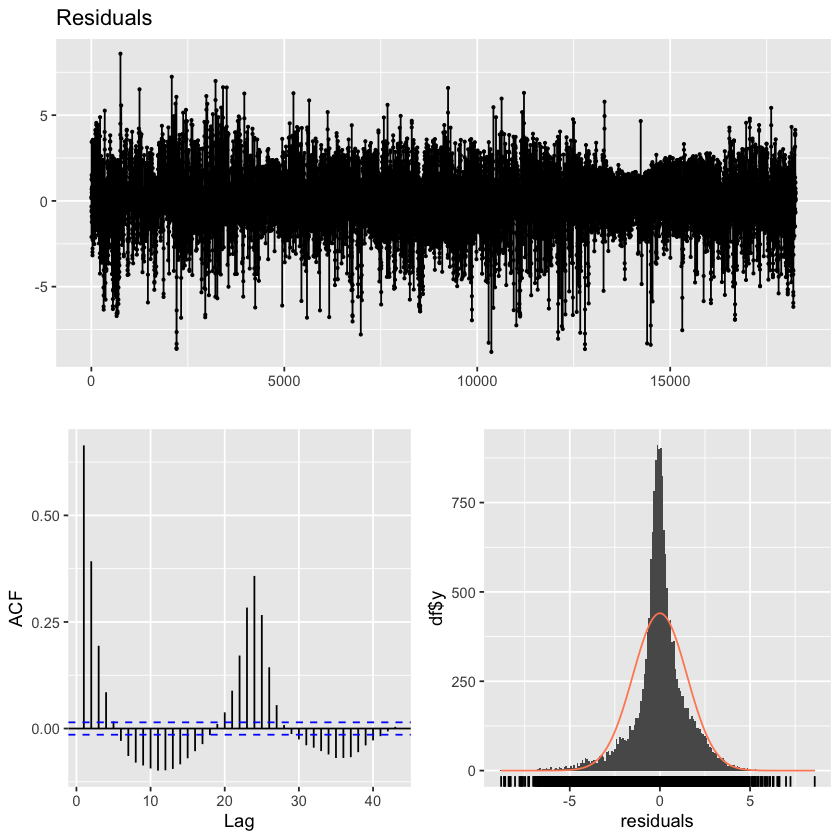

In [20]:
checkresiduals(linear_model)

As it can be deduced from the linear model, "TMP_surface","DLWRF" are significant regressors with less then 2e-16 P-values. I also applied trial error on "TMP_surface","DLWRF" regressor combination which worked really well. To be able to draw this conclusion, this model gives less WMAPE score compare to Arima and Sarima models. Therefore, I preferred using this model.

In [18]:
ForecastReportArimax2<- function(x_date) {
arima_vec_reg2 <- rep(NA,24)
for(i in 0:23) {
  dataf <- avgdata[date >= train_start & date < as.Date(x_date)-2 & hour == i,c("date","production")]
    dataf <- ts(dataf)
    regressor <- avgdata[date >= train_start & date < as.Date(x_date)-2 & hour == i,c("DLWRF","TMP_surface")]
  fitted_reg <- auto.arima(dataf[,'production'], xreg=data.matrix(regressor))
  regforecast <- avgdata[(date==x_date & hour==i) |(date==as.Date(x_date)+1 & hour==i |date==as.Date(x_date)+2 & hour==i),c("DLWRF","TMP_surface")]
  forecasted2=forecast(fitted_reg,xreg=data.matrix(regforecast),h=1)
  arima_vec_reg2[i+1] <- forecasted2$mean[1]
}
return(arima_vec_reg2)
}

This approach combines ARIMA with external regressors (DLWRF and TMP_surface). It can model the relationship between production and external factors while capturing time series characteristics with ARIMA.

## Evaluating the Models 

In [12]:
# Evaluate ARIMA
arima_forecast <- sapply(seq(test_start, test_end, by = "days"), ForecastReportAutoAr)
arima_accu <- accu(test_data$production, arima_forecast)
arima_accu


n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2520,2.53656,3.472413,1.368946,0.3263055,NaN,2.037706,1.189681,0.4690136,0.4690136


In [15]:
# Evaluate SARIMA
sarima_forecast <- sapply(seq(test_start, test_end, by = "days"), ForecastReportAutoSarima)
sarima_accu <- accu(test_data$production, sarima_forecast)


In [16]:
sarima_accu

n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2520,2.53656,3.472413,1.368946,0.2484679,Inf,1.973783,1.134044,0.4470796,0.4470796


In [19]:
# Evaluate Dynamic Regression with 2 regressors
arimax2_forecast <- sapply(seq(test_start, test_end, by = "days"), ForecastReportArimax2)
arimax2_accu <- accu(test_data$production, arimax2_forecast)
arimax2_accu



n,mean,sd,CV,FBias,MAPE,RMSE,MAD,MADP,WMAPE
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2520,2.53656,3.472413,1.368946,0.01454989,NaN,1.196558,0.6047923,0.2384302,0.2384302


## Comparing The Hybrid Model with Baseline Models

The hybrid model combining ARIMA with external regressors demonstrates the best performance among the evaluated methods. It captures both time series patterns and external influences, leading to more accurate forecasts. While ARIMA and SARIMA models provided valuable information, they were not adequate in leveraging external information, which is crucial for improving forecast accuracy.